In [ ]:
import pandas as pd

#Reading in all subjects as seperated dataframs
sheets = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]
data = pd.read_excel("riket2023_åk9_np.xlsx", sheet_name=sheets, skiprows=8)

for sheet, df in data.items():
    print(f"\n{sheet} - första raderna: ")
    print(df.head())


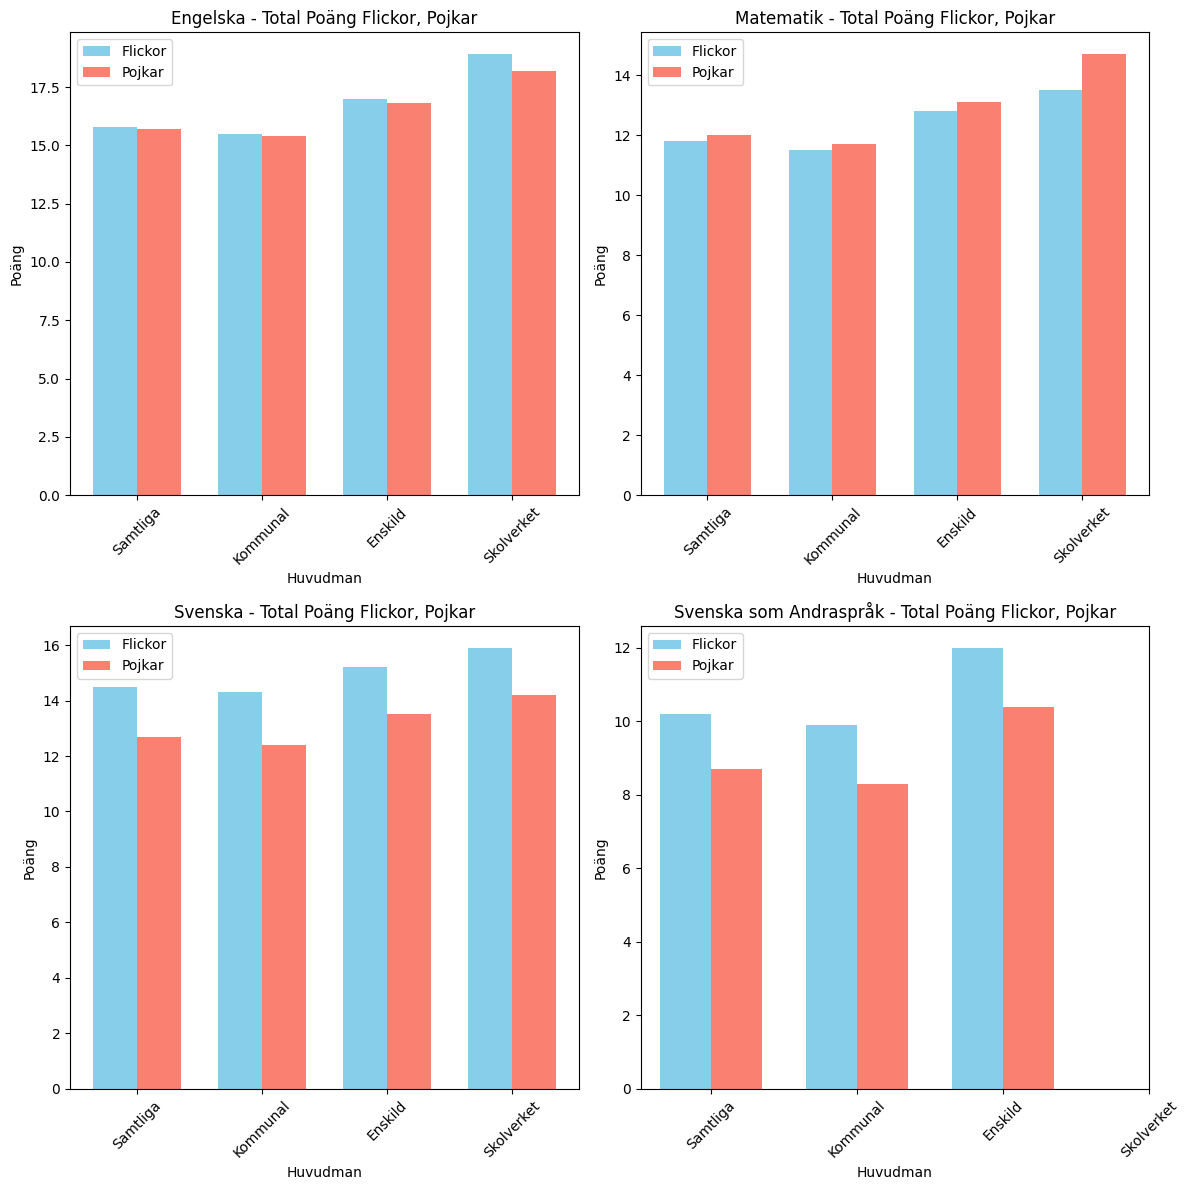

In [47]:
import matplotlib.pyplot as plt
import numpy as np

def rename_columns(df):
    # Changeing the column names
    df.columns = [
        "Plats",
        "Huvudman",
        "Totalt_A_F",
        "Flickor_A_F",
        "Pojkar_A_F",
        "Totalt_A_E",
        "Flickor_A_E",
        "Pojkar_A_E",
        "Totalt_poäng",
        "Flickor_poäng",
        "Pojkar_poäng",
    ]
    return df

# Change colmunnames for each subject
for sheet, df in data.items():
    data[sheet] = rename_columns(df)


# Function to create bar chart
def plot_scores(df, ax, subject_name):
    bar_width = 0.35 # the bar witdh
    index = np.arange(len(df)) #huvudman index
    
    # Conver "Total_poäng" to numeric values if it isn't already
    df['Totalt_poäng'] = pd.to_numeric(df['Totalt_poäng'], errors='coerce')
    df['Flickor_poäng'] = pd.to_numeric(df['Flickor_poäng'], errors='coerce')
    df['Pojkar_poäng'] = pd.to_numeric(df['Pojkar_poäng'], errors='coerce')

    ax.bar(index - bar_width / 2, df['Flickor_poäng'], bar_width, label='Flickor', color="skyblue")
    ax.bar(index + bar_width / 2, df['Pojkar_poäng'], bar_width, label='Pojkar', color="salmon")

    ax.set_title(f'{subject_name} - Total Poäng Flickor, Pojkar')
    ax.set_xlabel('Huvudman')
    ax.set_ylabel('Poäng')
    ax.set_xticks(index)
    ax.set_xticklabels(df['Huvudman'], rotation=45)
    ax.legend()


#Create fig with subplots
fig, axs = plt.subplots(2, 2, figsize=(12,12))

# Draw bar chart for each subject
plot_scores(data['Engelska'], axs[0, 0], "Engelska")
plot_scores(data['Matematik'], axs[0, 1], "Matematik")
plot_scores(data['Svenska'], axs[1, 0], "Svenska")
plot_scores(data['Svenska som andraspråk'], axs[1,1], "Svenska som Andraspråk")

# Adjust layout to avoid overlap
plt.tight_layout()

plt.show()
